# QTM 151 Final Project
Group 17<br>
Caleb, Dylan, Andrew<br>
## How does income level affect adult survival rate in Pacific-Asian nations?

In [30]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Description
This Project analyzes data from the Pacific Taiwan data file in the Human Rights Measurement Initiative dataset (HRMI).

# Data Preparation

Importing Pacific Dataset

In [31]:
data=pd.read_csv("../data/Pacific_Taiwan_data.csv")
data
#Variables to consider: Flag_HiY, Flag_LowerLowerMiddle, H_EducQual, PISAmath, PISAreading, PISAscience, PISAAverage, TotNetPrimEn, TotNetUpSecE

,Country,iso3c,Year,Flag_HiY,Flag_LoworLowerMiddle,AdultSurvival_All,AdultSurvival_All_Source,AdultSurvival_Female,AdultSurvival_Female_Source,AdultSurvival_Male,...,TotNetUpSecEn_Male,TotNetUpSecEn_Male_Source,U5Survival_All,U5Survival_All_Source,U5Survival_Female,U5Survival_Female_Source,U5Survival_Male,U5Survival_Male_Source,WaterInHome,WaterInHome_Source
0,American Samoa,ASM,1990.0,0.0,0.0,81.82854551,standard,87.903149,standard,76.860254,...,NaN,NaN,97.833546,United Nations Population Division Retrieved 1...,98.404261,United Nations Population Division Retrieved 1...,97.833546,United Nations Population Division Retrieved 1...,NaN,NaN
1,American Samoa,ASM,1991.0,0.0,0.0,82.7620723,standard,87.856735,standard,78.533306,...,NaN,NaN,98.034365,United Nations Population Division Retrieved 1...,98.420791,United Nations Population Division Retrieved 1...,98.034365,United Nations Population Division Retrieved 1...,NaN,NaN
2,American Samoa,ASM,1992.0,0.0,0.0,82.88132113,standard,87.940581,standard,78.664055,...,NaN,NaN,98.110429,United Nations Population Division Retrieved 1...,98.464718,United Nations Population Division Retrieved 1...,98.110429,United Nations Population Division Retrieved 1...,NaN,NaN
3,American Samoa,ASM,1993.0,0.0,0.0,83.06200618,standard,87.987146,standard,78.933376,...,NaN,NaN,98.167403,United Nations Population Division Retrieved 1...,98.532317,United Nations Population Division Retrieved 1...,98.167403,United Nations Population Division Retrieved 1...,NaN,NaN
4,American Samoa,ASM,1994.0,0.0,0.0,83.17903648,standard,87.972956,standard,79.118743,...,NaN,NaN,98.193620,United Nations Population Division Retrieved 1...,98.607430,United Nations Population Division Retrieved 1...,98.193620,United Nations Population Division Retrieved 1...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Converting the Adult Survival Rates of All from a object to a float datatype

In [32]:
data['AdultSurvival_All'].dtype

dtype('O')

In [33]:
data['AdultSurvival_All'] = pd.to_numeric(data['AdultSurvival_All'], errors='coerce') #Turning age value from object to number
data['AdultSurvival_All'].dtype

dtype('float64')

Cleaning up dataset to classify different income levels for each country

In [34]:
#Flag_Other displays a income level that is not lower lower middle or high
data["Flag_Other"]=np.where((data['Flag_HiY'] == 0) & (data['Flag_LoworLowerMiddle'] == 0), 1,0)
data.head() 

,Country,iso3c,Year,Flag_HiY,Flag_LoworLowerMiddle,AdultSurvival_All,AdultSurvival_All_Source,AdultSurvival_Female,AdultSurvival_Female_Source,AdultSurvival_Male,...,TotNetUpSecEn_Male_Source,U5Survival_All,U5Survival_All_Source,U5Survival_Female,U5Survival_Female_Source,U5Survival_Male,U5Survival_Male_Source,WaterInHome,WaterInHome_Source,Flag_Other
0,American Samoa,ASM,1990.0,0.0,0.0,81.828546,standard,87.903149,standard,76.860254,...,NaN,97.833546,United Nations Population Division Retrieved 1...,98.404261,United Nations Population Division Retrieved 1...,97.833546,United Nations Population Division Retrieved 1...,NaN,NaN,1
1,American Samoa,ASM,1991.0,0.0,0.0,82.762072,standard,87.856735,standard,78.533306,...,NaN,98.034365,United Nations Population Division Retrieved 1...,98.420791,United Nations Population Division Retrieved 1...,98.034365,United Nations Population Division Retrieved 1...,NaN,NaN,1
2,American Samoa,ASM,1992.0,0.0,0.0,82.881321,standard,87.940581,standard,78.664055,...,NaN,98.110429,United Nations Population Division Retrieved 1...,98.464718,United Nations Population Division Retrieved 1...,98.110429,United Nations Population Division Retrieved 1...,NaN,NaN,1
3,American Samoa,ASM,1993.0,0.0,0.0,83.062006,standard,87.987146,standard,78.933376,...,NaN,98.167403,United Nations Population Division Retrieved 1...,98.532317,United Nations Population Division Retrieved 1...,98.167403,United Nations Population Division Retrieved 1...,NaN,NaN,1
4,American Samoa,ASM,1994.0,0.0,0.0,83.179036,standard,87.972956,standard,79.118743,...,NaN,98.193620,United Nations Population Division Retrieved 1...,98.607430,United Nations Population Division Retrieved 1...,98.193620,United Nations Population Division Retrieved 1...,NaN,NaN,1


In [35]:
# Create a new column "Income_Level" based on the flag columns
def get_income_level(row):
    if row['Flag_HiY']:
        return "HiY"
    elif row['Flag_LoworLowerMiddle']:
        return "Low or Lower Middle"
    elif row['Flag_Other']:
        return "Other"
    else:
        return "Unknown"

data['Income_Level'] = data.apply(get_income_level, axis=1)

# Taiwan's Adult Survival Rate is not Abnormally Higher than Other Pacific-Asian Countries
## Line Graph
 According to the World Bank, Taiwan is currently the Pacific-Asian country with the highest GDP. In the dataset, Taiwan is also indicated to be a high income country in every year that their data is recorded. Knowing this information, we wanted to assess how Taiwan's adult survival rate stacked up against other countries. This graph compares the adult survival rate (total percentage of adults at age 15 surviving to age 60) of Pacific-Asian countries at different income levels. Each data point represents the survival rate of a country in a specific year, with the x axis position representing the income level they were classified in that year. The points that are highlighted in red indicate the adult survival rate of Taiwan, while the gray points represents all the other Pacific-Asian countries. The data on the right indicates countries with low income level, the middle data indicates countries with high income level, and the left data indicates countries with medium level income. 



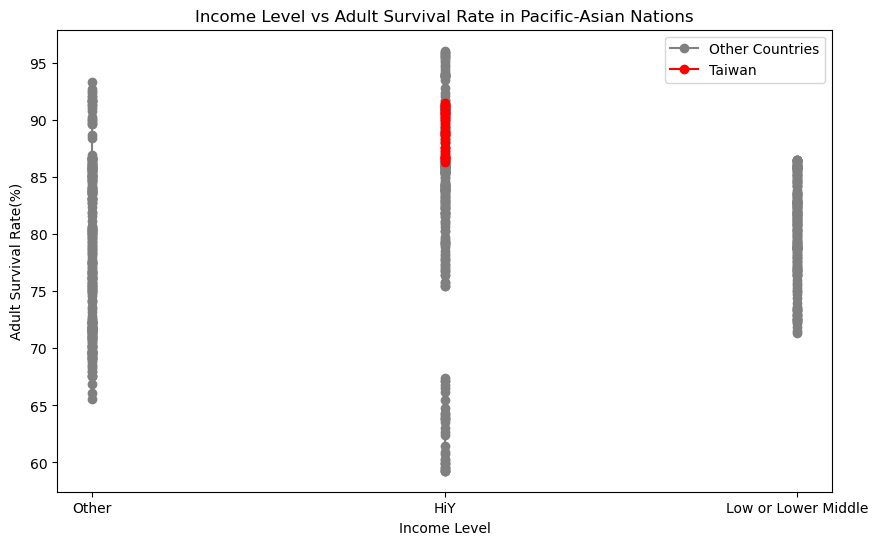

In [36]:
#Seperating data from Taiwan from other countries
taiwan = data[data["Country"] == "Taiwan"]
other = data[data["Country"] != "Taiwan"]
plt.figure(figsize=(10,6))
label=False
#Creating line plot for each country's data besides Taiwan and allocating the correct label
for country in other["Country"].unique():
    if not label:
        country_data = other[other["Country"] == country]
        plt.plot(country_data["Income_Level"], country_data["AdultSurvival_All"],
             color="gray",  marker='o', label="Other Countries")
        label=True
    else:
        country_data = other[other["Country"] == country]
        plt.plot(country_data["Income_Level"], country_data["AdultSurvival_All"],
             color="gray",  marker='o', label="_nolegend_")
#Creating line plot for Taiwan data
plt.plot(taiwan["Income_Level"], taiwan["AdultSurvival_All"],
         color="red", marker='o', label="Taiwan")
plt.title("Income Level vs Adult Survival Rate in Pacific-Asian Nations")
plt.xlabel("Income Level")
plt.ylabel("Adult Survival Rate(%)")
plt.legend(loc="upper right")
plt.show()

This graph indicates that Taiwan has a higher than average adult survival rate. However, there are years when countries have recorded higher adult survival rates than Taiwan, even in the medium level income column.

Wanting to look more specifically at how Taiwan's adult survival rate has changed over the years, this next plot is a line graph that indicates the adult survival rate of countries that are classified as high income level from 1990 to early 2020s. Data from a country will only be plotted in years that they are classified as high income level. The color of the points indicate the specific country, which can be referenced in the legend.

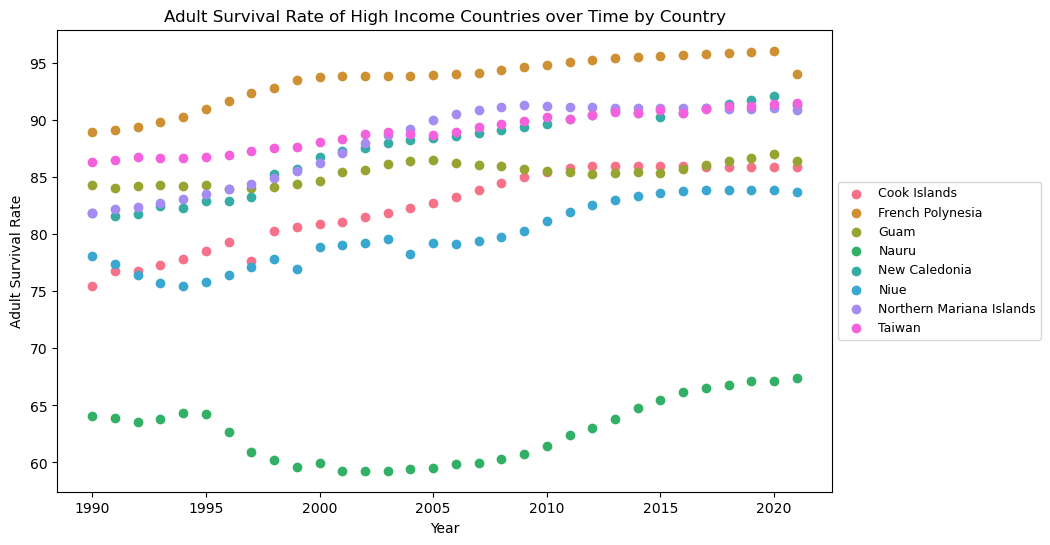

In [37]:
import seaborn as sns
from scipy.stats import linregress
array={}
#Filtering data to only represent high income level countries
df=data[data["Flag_HiY"]==1]
#Helps to associate different colors with countries in graph
palette = sns.color_palette("husl", len(df["Country"].unique()))
plt.figure(figsize=(10, 6))
#Plotting scatter plot for data from each country
for i, country in enumerate(df["Country"].unique()):
    country_data = df[df["Country"] == country]
    plt.scatter(country_data["Year"], country_data["AdultSurvival_All"],
                color=palette[i], label=country)
    #Implementing linear regression for each country's data and adding the linear slope to dictionary
    slope_hi, intercept_hi, _, _, _ = linregress(country_data["Year"], country_data["AdultSurvival_All"])
    array[country]=(slope_hi)
plt.title("Adult Survival Rate of High Income Countries over Time by Country")
plt.xlabel("Year")
plt.ylabel("Adult Survival Rate")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=9)
plt.show()

In [38]:
#Displaying linear regression slope for each country
array

{'Cook Islands': 0.358057970555352,
 'French Polynesia': 0.20858532683284461,
 'Guam': 0.07902973622800583,
 'Nauru': 0.13476676912206734,
 'New Caledonia': 0.35617714897543984,
 'Niue': 0.29042076648643683,
 'Northern Mariana Islands': 0.3412665598955279,
 'Taiwan': 0.18038815167522}

Here we can see that French Polynesia has a higher adult survival rate than Taiwan throughout the years. Additionally, it exhibits a higher regression slope than Taiwan, indicating that its adult survival rate has a higher rate of increase over time. Other countries such as Cook Islands, New Caledonia, and Niue also exhibit higher regression slopes. 

Summary: While Taiwan has the highest GDP of the Pacific-Asian countries, this does not correlate with them having the highest survival rate or that they have the greatest improvement over time

# Men and Women Experience Survival Differently Across Pacific Nations
## Box Plot
 While income plays a major role in shaping health outcomes, gender can introduce another layer of disparity. This graph examines whether adult survival rates differ systematically between men and women across the Pacific-Asian region. Gender-based survival differences may reflect a complex mixture of social, biological, and healthcare system factors. For instance, men might face higher mortality due to occupational hazards or behavioral risk factors, while women might face barriers to accessing care in certain societies.We begin by comparing the distribution of adult survival rates across all countries in the dataset, separately for males and females. Next, we break this down by income groups to explore whether high-income nations exhibit smaller or larger gender gaps. Lastly, we isolate Taiwan and analyze how its male and female survival rates have changed over time. Boxplot

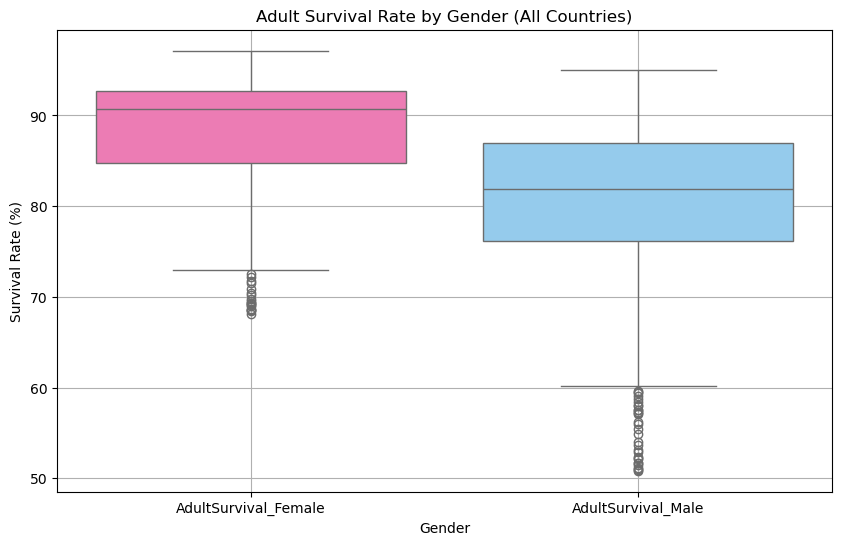

In [39]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df[['AdultSurvival_Female', 'AdultSurvival_Male']].melt(),  # reshape data to long format
    x='variable',
    y='value',
    hue='variable',  # <- Assign hue
    palette={'AdultSurvival_Female': '#FF69B4', 'AdultSurvival_Male': '#87CEFA'},  # pink and blue
    legend=False  # <- Hide redundant legend
)

plt.title('Adult Survival Rate by Gender (All Countries)')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Gender')
plt.grid(True)
plt.show()

Continuing on, this next box plot compares male and female adult survival rates across different income groups. We see that in both high-income and low-income categories, females consistently exhibit higher median survival rates than males. However, the variation is much more pronounced in low- and lower-middle income countries, where male survival rates drop sharply in several cases. The tighter clustering of the high-income group suggests more consistent healthcare access and social conditions, while the wider spread in low-income countries reflects instability and unequal access to care—particularly for men.

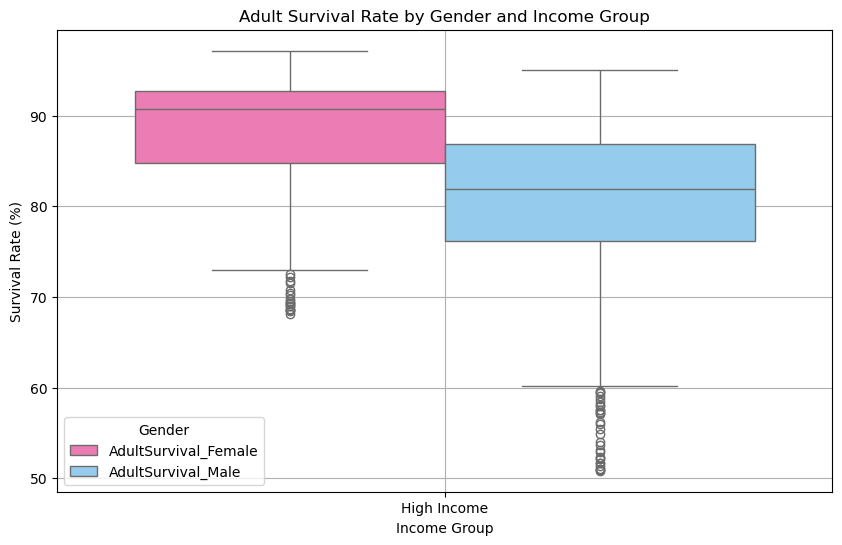

In [40]:
# Filter countries with income classification flags (either high income or low/lower-middle income)
df_gender = df[(df['Flag_HiY'] == 1) | (df['Flag_LoworLowerMiddle'] == 1)].copy()

# Add a new column called 'Income Group' for clearer labels
df_gender['Income Group'] = df_gender.apply(
    lambda row: 'High Income' if row['Flag_HiY'] == 1 else 'Low/Lower-Middle Income', axis=1
)

# Reshape the DataFrame from wide to long format so Seaborn can plot gender groups
df_melted = df_gender.melt(
    id_vars='Income Group',  # keep income group info
    value_vars=['AdultSurvival_Female', 'AdultSurvival_Male'],  # gendered survival data
    var_name='Gender', value_name='Survival Rate'
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x='Income Group', y='Survival Rate', hue='Gender', palette=['#FF69B4', '#87CEFA'])
plt.title('Adult Survival Rate by Gender and Income Group')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Income Group')
plt.grid(True)
plt.legend(title='Gender')
plt.show()

The analysis of adult survival rates by gender reveals a consistent global trend: females tend to outlive males across Pacific-Asian nations. Box Plot 1 illustrates this disparity clearly, with female survival rates exhibiting both higher medians and fewer extreme low values compared to their male counterparts. However, this pattern is not uniform across all contexts. Box Plot 2 demonstrates that income level plays a critical role in shaping the gender gap. In high-income countries, survival outcomes are relatively consistent and the gender disparity is modest, suggesting broad access to healthcare and social stability. Conversely, in low- and lower-middle-income countries, the gender gap widens, and male survival rates are more erratic, pointing to systemic inequalities and uneven resource distribution. Together, these findings highlight the intersection of gender and socioeconomic factors in determining adult health outcomes.

# Varied Age Ranges from High to Low Income Level Nations
## Histogram
The adult survival rate from Pacific-Asian nations vary quite interestingly between nations with higher, average, and lower income levels. The distribution for this group is skewed towards higher values, with a significant concentration above 80%, and relatively few countries falling below 70%. This indicates that very low adult survival rates are rare among high-income nations. Lower or lower-middle-income countries show a more balanced distribution centered around a mean of 80.5%. While many fall within the 75–85% survival range, they are less likely to reach the very highest survival rates seen in the HiY group. Lastly, the "Other" group, which has a mean survival rate of about 78.4%, exhibits the widest spread. Countries in this category are more frequently found at lower survival rates, with a notable portion falling below 75%, though some also achieve survival rates similar to higher-income countries.

In short, income levels generally change the adult survival rate. However, lower income level nations do not make up of the majority of low adult survival rate. The high income level nations have the highest average at 83.6% while the lower level income nations average at around 80.49%. Finally, all other income level nations have the lowest average adult survival rate at a measly 78.39%. 

Thus, higher income levels show correlation in increased life expectancy for Pacific Asian nations, though only for nations within high or low extremeties. 

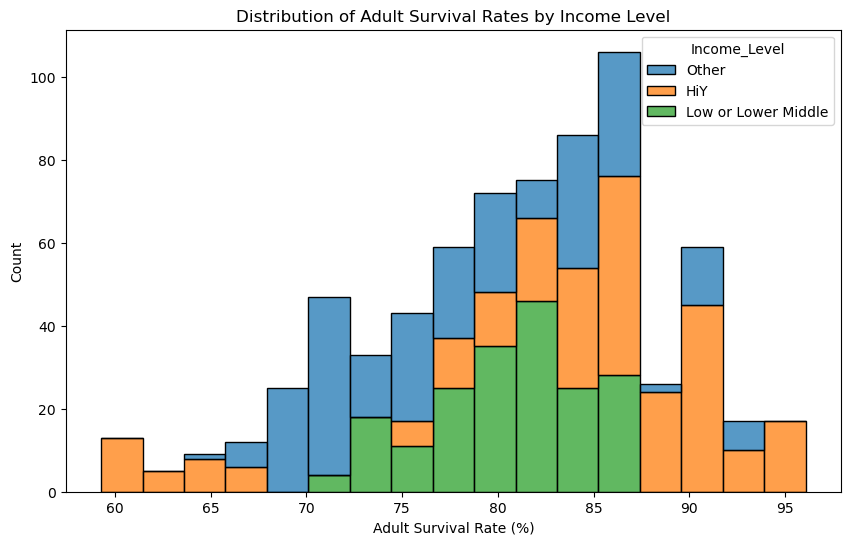

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='AdultSurvival_All', hue='Income_Level', 
element="bars", multiple="stack", common_norm=False)
plt.title('Distribution of Adult Survival Rates by Income Level')
plt.xlabel('Adult Survival Rate (%)')
plt.ylabel('Count')
plt.show()

This histogram shows the number of adult survival rate percentages based on each income level. Each income level is stacked on top of each other to easily see where each income level populates with which specific ranges. 

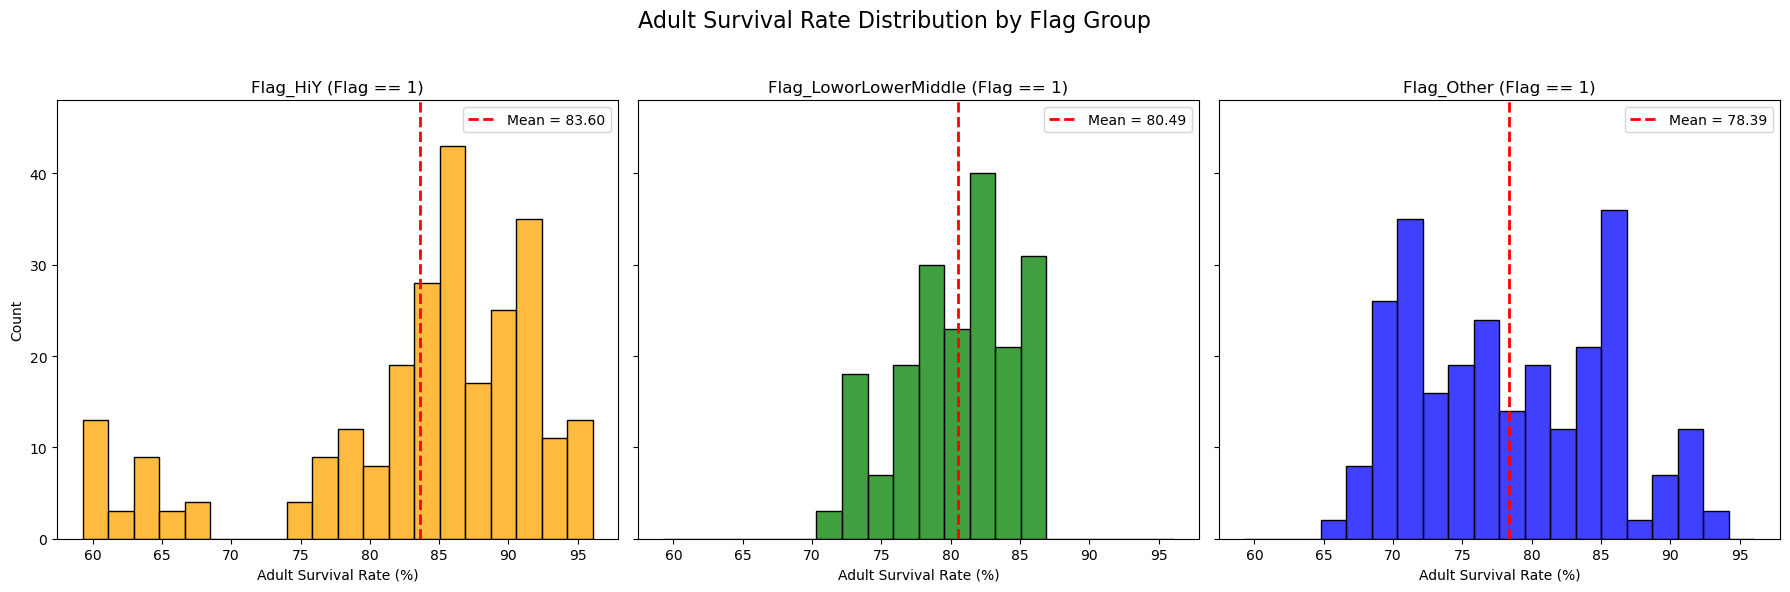

In [42]:
flag_attributes = ['Flag_HiY', 'Flag_LoworLowerMiddle', 'Flag_Other']
colors = ['orange', 'green', 'blue']

min_val, max_val = data['AdultSurvival_All'].min(), data['AdultSurvival_All'].max()
num_bins = 20
bin_range = (min_val, max_val)

global_max = max(
    np.histogram(data[data[flag] == 1]['AdultSurvival_All'], bins=num_bins, range=bin_range)[0].max()
    for flag in flag_attributes
)

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

for ax, flag, color in zip(axes, flag_attributes, colors):
    filtered_data = data[data[flag] == 1]['AdultSurvival_All']
    
    sns.histplot(filtered_data, element="bars", bins=num_bins, binrange=bin_range, color=color, ax=ax)

    mean_value = filtered_data.mean()
    ax.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean_value:.2f}')
    
    ax.set_title(f'{flag} (Flag == 1)')
    ax.set_xlabel('Adult Survival Rate (%)')
    ax.set_ylim(0, global_max + 5)
    ax.legend()

axes[0].set_ylabel('Count')
plt.suptitle('Adult Survival Rate Distribution by Flag Group', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Each of these histograms represent their respective number of adult survival rate percentages, but separated to within their levels to see the distribution much more clearly within nations of similar income levels. In addition, a red dashed line is incuded showing the mean adult survival rate to see where major outliers exist. 